# London Bike Sharing -- EDA and Visualization-- 

## **About Data**

using Kaggle london-bike-sharing-dataset


In order to reduce traffic congestion and air pollution in London, the government encourages people to use shared bicycles. This demand for shared bicycles is influenced by several factors. Factors such as air temperature, humidity, wind, whether it is a holiday or weekend and the season are all important. We can use this information to get some conclusions about people's habits,etc when it comes to bike sharing. 


**Dataset Schema** 

**Timestamp:** timestamp indicating the date and time of each observation.<br>
**cnt (count):** the count of new bike shares recorded for each timestamp.<br>
**t1:** real temperature in Celsius at the time of observation.<br>
**t2:** perceived temperature in Celsius, known as Real Feel Temperature<br>
**Hum (humudity):**  humidity level expressed as a percentage.<br>
**windspeed:** Self Explanatory.<br>
**weather_code:** The categories according to this chart:

* **1 -** Clear or mostly clear with possible haze, fog, or patches of fog
* **2 -** Scattered clouds or few clouds
* **3 -** Broken clouds
* **4 -** Cloudy
* **7 -** Rain, light rain shower, or light rain
* **10 -** Rain with thunderstorm 
* **26 -** Snowfall.

**is _holiday:** The observation is a holiday (1) or a non-holiday (0).<br>
**is_weekend:** The observation falls on a weekend (1) or a non-weekend day (0).<br>
**season:** Categories of the column:

    **0 -** Spring, 
    **1 -** Summer, 
    **2 -** Fall, 
    **3 -** Winter.



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## a) Let's check the structure of the dataframe

In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


** CONCLUSION 1: 10 columns, 'weather_code','is_holiday', 'is_weekend', 'season' are float type, it is adviseable to replace their codified values with friendly legends, so later on results of calculations are more readable, for example in col 'is_weekend' we should see Weekend or Not Weekend value instead of 1's and 0's.

** CONCLUSION 2: 'timestamp' column is an object, ie. a string. Given the nature of the value we should change it to date object in case we need to do some time series calculations or extracting the values of day of week o day number

In [5]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [6]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

**there are no Null values in the dataframe

## b) Time to implement some changes on the columns we mentioned before. Note the "inplace" parameter set True so that the changes take place in the dataset

In [7]:
# Season
df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

#Is Holiday
df['is_holiday'].replace(1, 'Holiday', inplace=True)
df['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Is weekend
df['is_weekend'].replace(1, 'Weekend', inplace=True)
df['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#------------------------------------------------------------

#Weather Codes
df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain', inplace=True)
df['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)
df['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter


**Now we add a new column 'Date' based on  'timestamp' but with datetime type**

In [8]:
df['date'] = pd.to_datetime(df['timestamp']) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  object        
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  object        
 9   season        17414 non-null  object        
 10  date          17414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:

df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00,Sunday,January


## b) Distribution of share count per day of week, month, weather, season and holiday

### We can estimate the amount of bike renting per day, by grouping the rows

In [10]:
# Day

daily_bike_share  = (df.groupby('day')['cnt'].sum()/1000000).round(1)
daily_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: cnt, dtype: float64

**Observation: On Thursday, Tuesday and Wednesday we have 3.1 million renting per day**

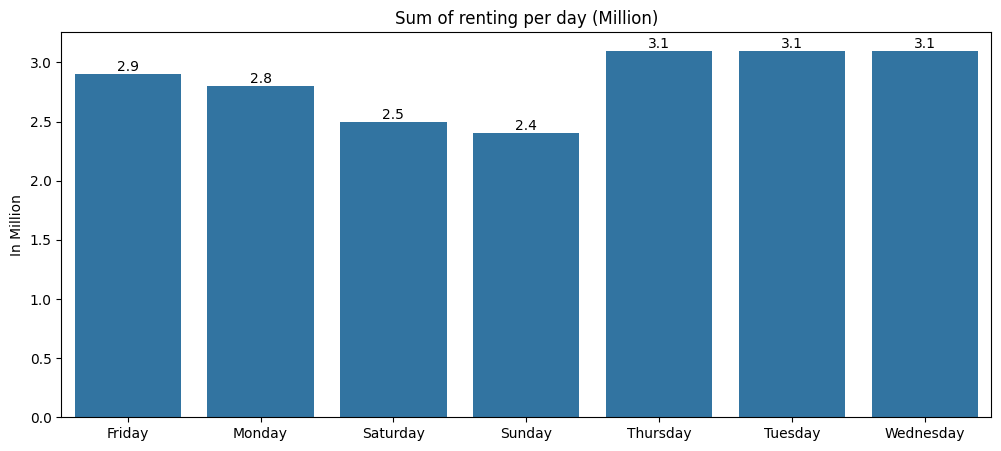

In [11]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=daily_bike_share.index, y=daily_bike_share.values, errorbar=None)
ax.set_title("Sum of renting per day (Million)")
ax.set_xlabel('') # To cancel writing "day" on the x-axis 
ax.set_ylabel('In Million')
for i in ax.containers:
    ax.bar_label(i)

### We can estimate the amount of share counts per month, and express the figure in million

In [12]:
# Month

monthly_bike_share  = (df.groupby('month')['cnt'].sum()/1000000).round(1)
monthly_bike_share

month
April        1.6
August       2.2
December     1.3
February     1.1
January      1.2
July         2.3
June         2.0
March        1.4
May          1.9
November     1.4
October      1.8
September    1.9
Name: cnt, dtype: float64

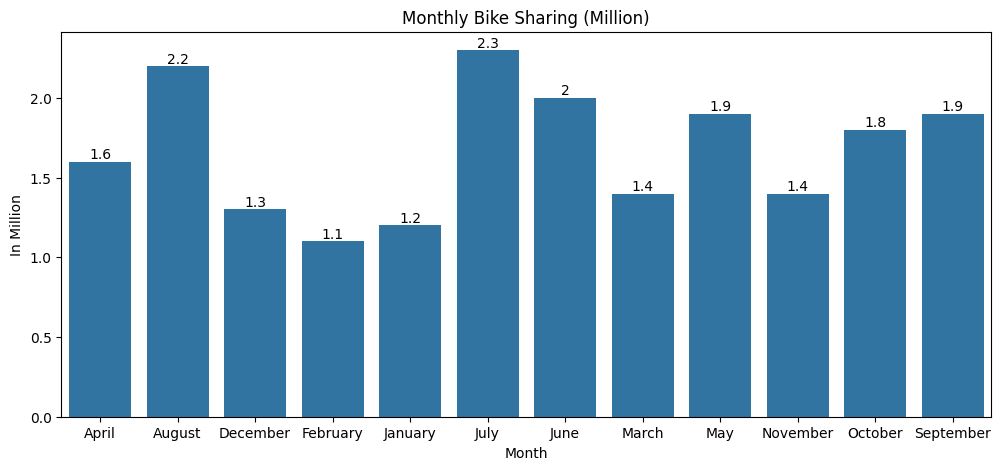

In [13]:
# Month

plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Monthly Bike Sharing (Million)")
ax.set_xlabel('Month')  
ax.set_ylabel('In Million')
for i in ax.containers:
    ax.bar_label(i)

### Distribution per  season

In [14]:
#Season 

seasonally_bike_share  = (df.groupby('season')['cnt'].sum()/1000000).round(1)
seasonally_bike_share

season
Fall      5.1
Spring    4.9
Summer    6.4
Winter    3.6
Name: cnt, dtype: float64

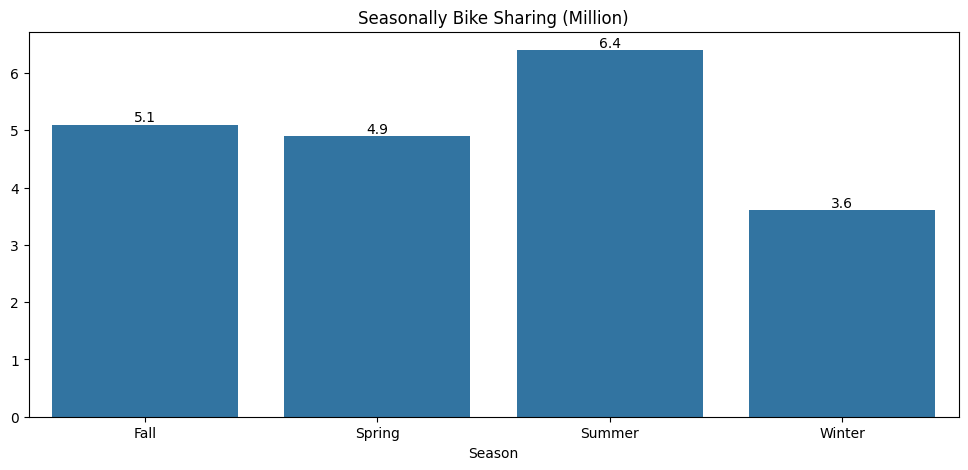

In [15]:
#Season 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=seasonally_bike_share.index, y=seasonally_bike_share.values, errorbar=None)
ax.set_title("Seasonally Bike Sharing (Million)")
ax.set_xlabel('Season')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per weather condition

In [16]:
# Weather 

weather_bike_share  = (df.groupby('weather_code')['cnt'].sum()/1000000).round(1)
weather_bike_share

weather_code
Broken clouds             4.2
Clear                     7.1
Cloudy                    0.9
Rain                      1.5
rain with thunderstorm    0.0
scattered clouds          6.0
snowfall                  0.0
Name: cnt, dtype: float64

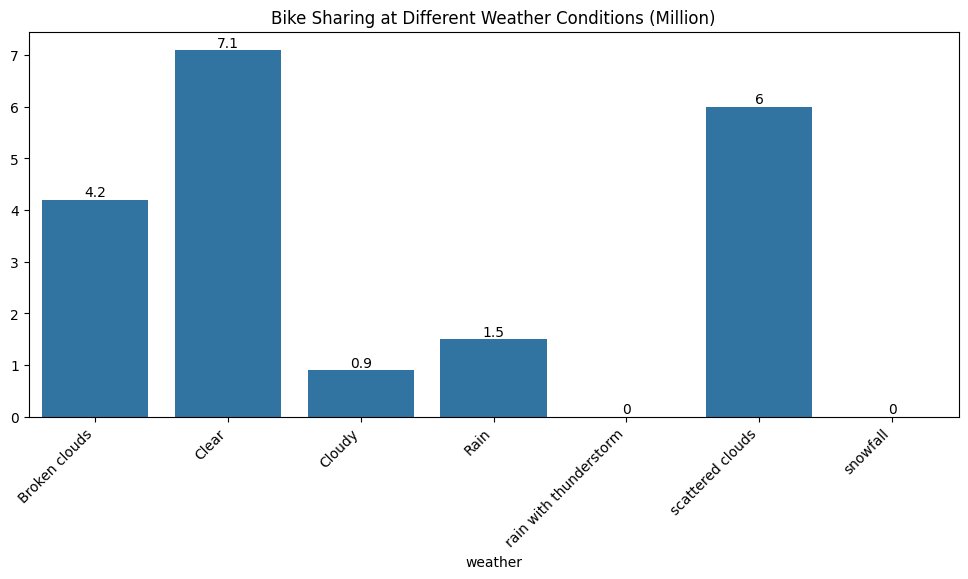

In [17]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Different Weather Conditions (Million)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('weather')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per  Holiday value

In [18]:
# Holiday 

weather_bike_share  = (df.groupby("is_holiday")['cnt'].sum()/1000000).round(1)
weather_bike_share

is_holiday
Holiday         0.3
Non-holiday    19.6
Name: cnt, dtype: float64

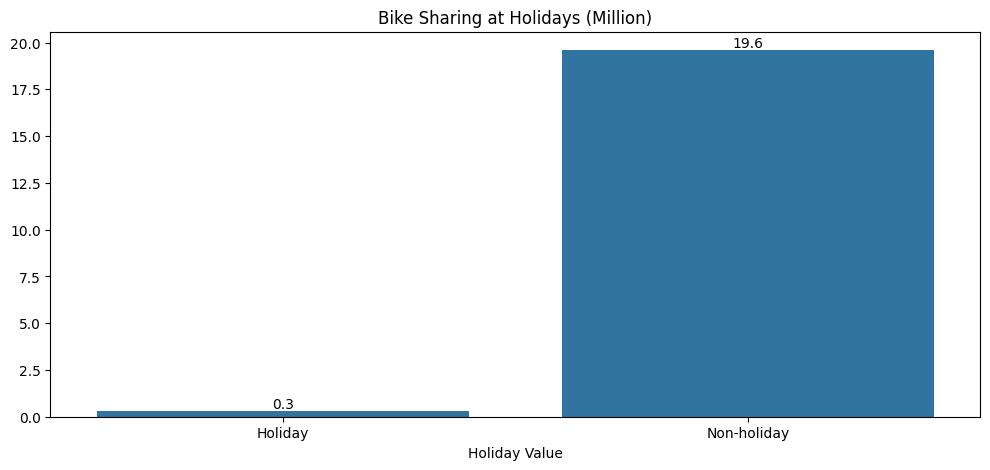

In [19]:
# Holiday 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Holidays (Million)")
ax.set_xlabel('Holiday Value')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per  weekends/weekdays

In [20]:
# Weekend 

weekend_bike_share  = (df.groupby('is_weekend')['cnt'].sum()/1000000).round(1)
weekend_bike_share

is_weekend
Non-weekend    15.0
Weekend         4.9
Name: cnt, dtype: float64

In [ ]:
# Weekend

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weekend_bike_share.index, y=weekend_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Weekends (Million)")
ax.set_xlabel('is weekend')  

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high on non-week days.

## WAY for drawing figures

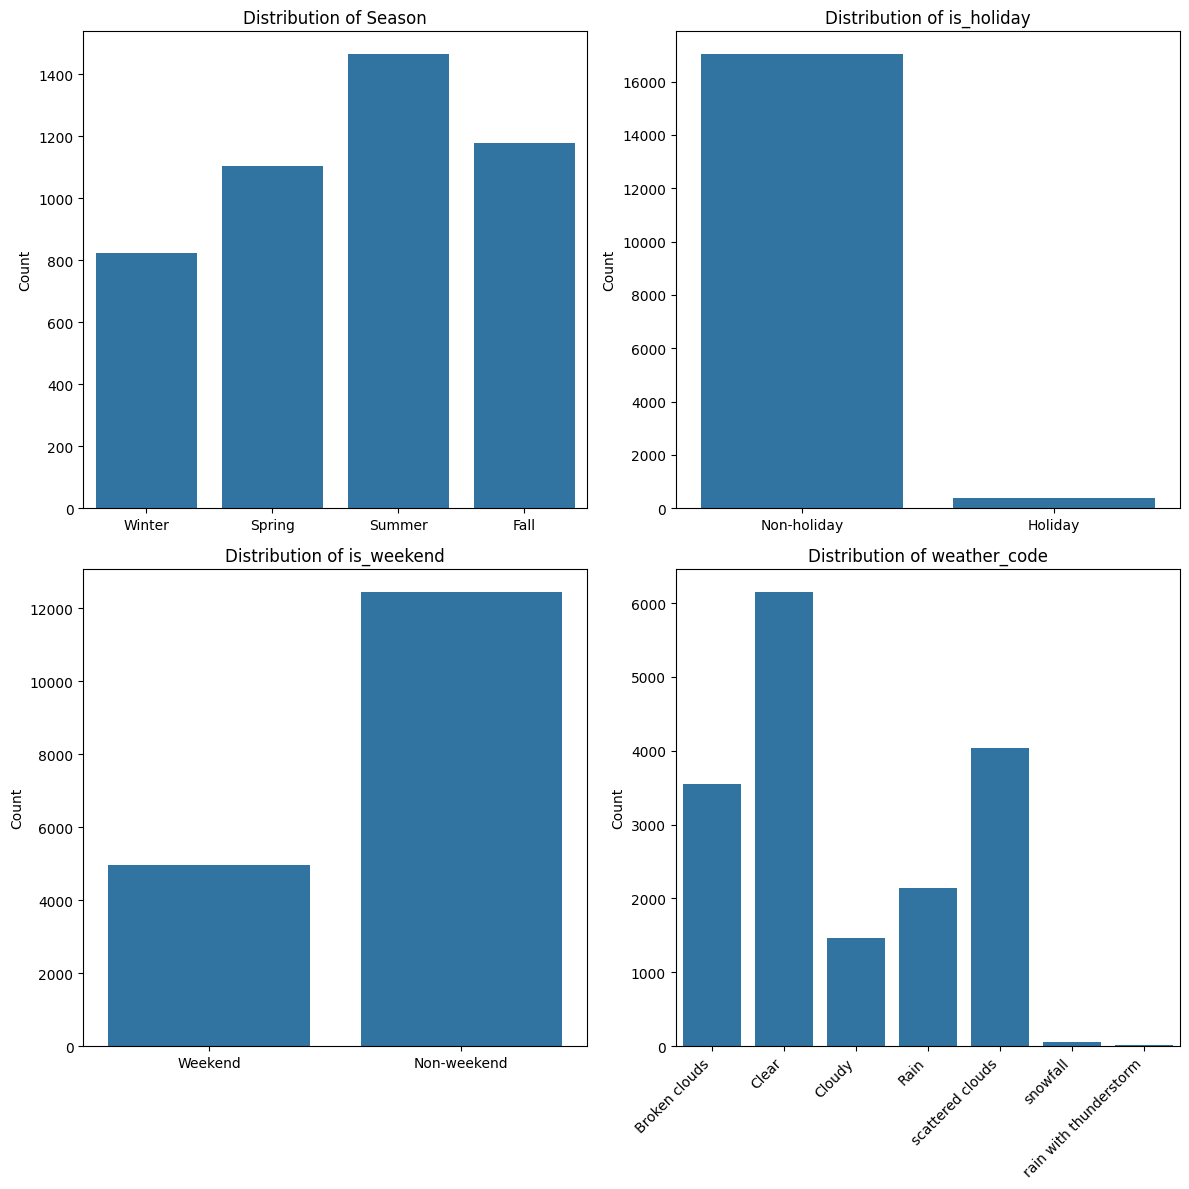

In [21]:
# 2. Way:

fig, ax = plt.subplots(2,2, figsize=(12, 12))


#ax=sns.barplot(data=df, x="season", y="cnt", errorbar=None)

# first plot by season
sns.barplot(data=df, x="season", y="cnt", ax = ax[0][0], errorbar=None)
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Season')
ax[0][0].set_xlabel('')

# second plot by holiday
sns.countplot(data=df, x="is_holiday", ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of is_holiday')
ax[0][1].set_xlabel('')

# third plot by weekend
sns.countplot(data=df, x="is_weekend", ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of is_weekend')
ax[1][0].set_xlabel('')

# fourth plot by weather code
sns.countplot(data=df, x="weather_code", ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of weather_code')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')
ax[1][1].set_xlabel('')

fig.tight_layout()
plt.show()

**Insight:** People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire is higher on working days and on days with clear weather.

## boxenplots for outlier analyses

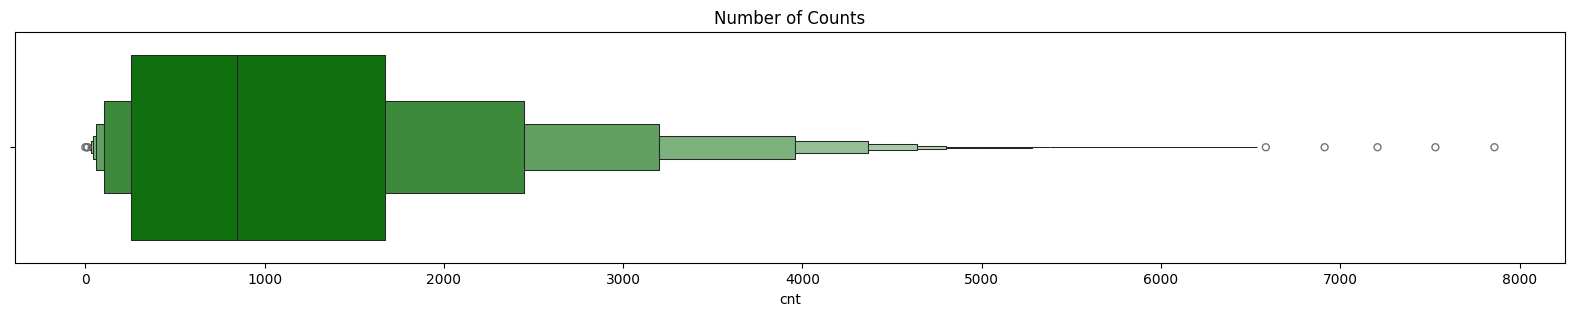

In [22]:
plt.figure(figsize=(20,3))
plt.title('Number of Counts')
sns.boxenplot(x=df["cnt"], color='g');

* 5 outliers spotted (cnt) on the higher side.

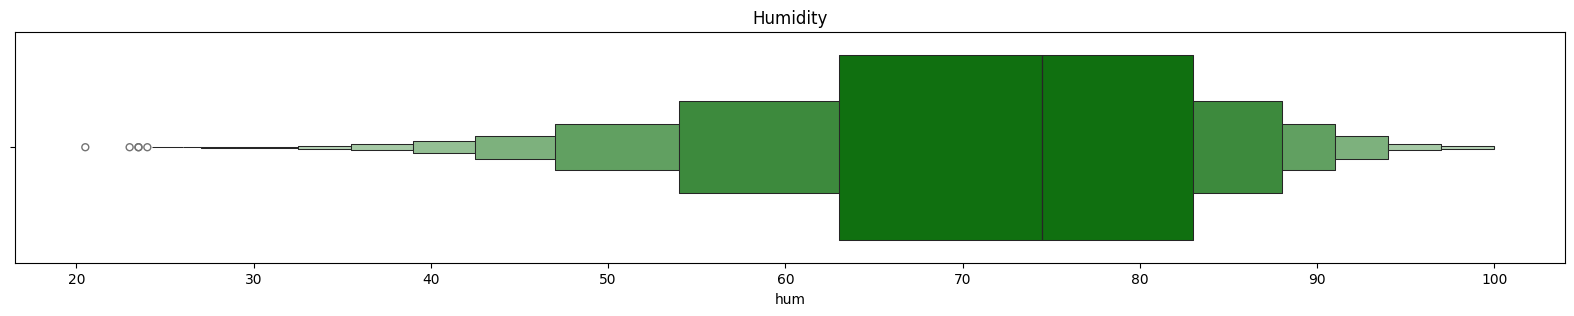

In [23]:
plt.figure(figsize=(20,3))
plt.title('Humidity')
sns.boxenplot(x=df["hum"], color='g');

* 4 outliers spotted in hummudity on the low side.

In [ ]:
plt.figure(figsize=(20,3))
plt.title('Wind Speed')
sns.boxenplot(x=df["wind_speed"], color='g');

* 4 outliers spotted in wind speed on the higher side.

# Let's look at the data type of each variable, transform timestamp in type, and set it as index.

In [24]:
# Read again data set;

df=pd.read_csv("london_merged.csv")
df.sample(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
3409,2015-05-26 09:00:00,1958,14.0,14.0,63.0,18.0,2.0,0.0,0.0,0.0
6300,2015-09-24 12:00:00,1478,17.5,17.5,60.0,23.0,2.0,0.0,0.0,2.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [26]:
# Let's convert the variable "timestamp" from object format to "datetime" format and store 
# it in a new column;

df['date'] = pd.to_datetime(df['timestamp'])

In [ ]:
df['date'].dtype

In [27]:
#I want to use timestamp as index.
# If we don`t use timespamp as index, we couldn`t use next method for extracting date infos from timestamp;

df = df.set_index(df['date']) 
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
date,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00


# Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.


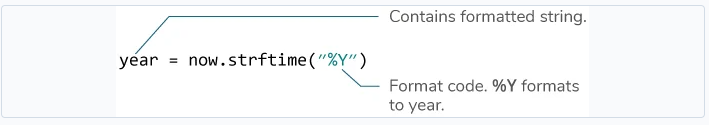

https://www.programiz.com/python-programming/datetime/strftime

**Directive Meaning Example**

* **%a** Abbreviated weekday name. Sun, Mon, ...
* **%A** Full weekday name. Sunday, Monday, ...
* **%w** Weekday as a decimal number. 0, 1, ..., 6
* **%d** Day of the month as a zero-padded decimal. 01, 02, ..., 31
* **%-d** Day of the month as a decimal number. 1, 2, ..., 30
* **%b** Abbreviated month name. Jan, Feb, ..., Dec
* **%B** Full month name. January, February, ...
* **%m** Month as a zero-padded decimal number. 01, 02, ..., 12
* **%-m** Month as a decimal number. 1, 2, ..., 12
* **%y** Year without century as a zero-padded decimal number. 00, 01, ..., 99
* **%-y** Year without century as a decimal number. 0, 1, ..., 99
* **%Y** Year with century as a decimal number. 2013, 2019 etc.
* **%H** Hour (24-hour clock) as a zero-padded decimal number. 00, 01, ..., 23
* **%-H** Hour (24-hour clock) as a decimal number. 0, 1, ..., 23
* **%I** Hour (12-hour clock) as a zero-padded decimal number. 01, 02, ..., 12
* **%-I** Hour (12-hour clock) as a decimal number. 1, 2, ... 12
* **%p** Locale’s AM or PM. AM, PM
* **%M** Minute as a zero-padded decimal number. 00, 01, ..., 59
* **%-M** Minute as a decimal number. 0, 1, ..., 59
* **%S** Second as a zero-padded decimal number. 00, 01, ..., 59
* **%-S** Second as a decimal number. 0, 1, ..., 59
* **%f** Microsecond as a decimal number, zero-padded on the left. 000000 - 999999
* **%z** UTC offset in the form +HHMM or -HHMM.
* **%Z** Time zone name.
* **%j** Day of the year as a zero-padded decimal number. 001, 002, ..., 366
* **%-j** Day of the year as a decimal number. 1, 2, ..., 366
* **%U** Week number of the year (Sunday as the first day of the week). All days in a new year preceding the first Sunday are considered to be in week 0. 00, 01, ..., 53
* **%W** Week number of the year (Monday as the first day of the week). All days in a new year preceding the first Monday are considered to be in week 0. 00, 01, ..., 53
* **%c** Locale’s appropriate date and time representation. Mon Sep 30 07:06:05 2013
* **%x** Locale’s appropriate date representation. 09/30/13
* **%X** Locale’s appropriate time representation. 07:06:05
* **%% A** literal '%' character. %


In [28]:
# Let's take years of "datetime" data.
df["year"] = df.index.strftime('%Y')
df["year"]

date
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: object

In [29]:
# What is the day number?

df["day"] = df.index.strftime("%d")  
print(df["day"])
pd


date
2015-01-04 00:00:00    04
2015-01-04 01:00:00    04
2015-01-04 02:00:00    04
2015-01-04 03:00:00    04
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    03
2017-01-03 20:00:00    03
2017-01-03 21:00:00    03
2017-01-03 22:00:00    03
2017-01-03 23:00:00    03
Name: day, Length: 17414, dtype: object


<module 'pandas' from 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

In [30]:
# Day names;

df['day_name'] = df.index.day_name()
df['day_name'] 

date
2015-01-04 00:00:00     Sunday
2015-01-04 01:00:00     Sunday
2015-01-04 02:00:00     Sunday
2015-01-04 03:00:00     Sunday
2015-01-04 04:00:00     Sunday
                        ...   
2017-01-03 19:00:00    Tuesday
2017-01-03 20:00:00    Tuesday
2017-01-03 21:00:00    Tuesday
2017-01-03 22:00:00    Tuesday
2017-01-03 23:00:00    Tuesday
Name: day_name, Length: 17414, dtype: object

In [31]:
# Which day of month;

df["month"] = df.index.strftime("%m") # 2.YOL: df['day_of_month'] = df.index.day
df["month"]

date
2015-01-04 00:00:00    01
2015-01-04 01:00:00    01
2015-01-04 02:00:00    01
2015-01-04 03:00:00    01
2015-01-04 04:00:00    01
                       ..
2017-01-03 19:00:00    01
2017-01-03 20:00:00    01
2017-01-03 21:00:00    01
2017-01-03 22:00:00    01
2017-01-03 23:00:00    01
Name: month, Length: 17414, dtype: object

In [32]:
# hour 1. WAY;  

df["hour"] = df.index.strftime("%H")
df["hour"]

date
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

In [33]:
# 2. WAY; Hour; 

df['hour2'] = df.index.hour
df['hour2'] 

date
2015-01-04 00:00:00     0
2015-01-04 01:00:00     1
2015-01-04 02:00:00     2
2015-01-04 03:00:00     3
2015-01-04 04:00:00     4
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour2, Length: 17414, dtype: int32

# Visualize the correlation with a heatmap

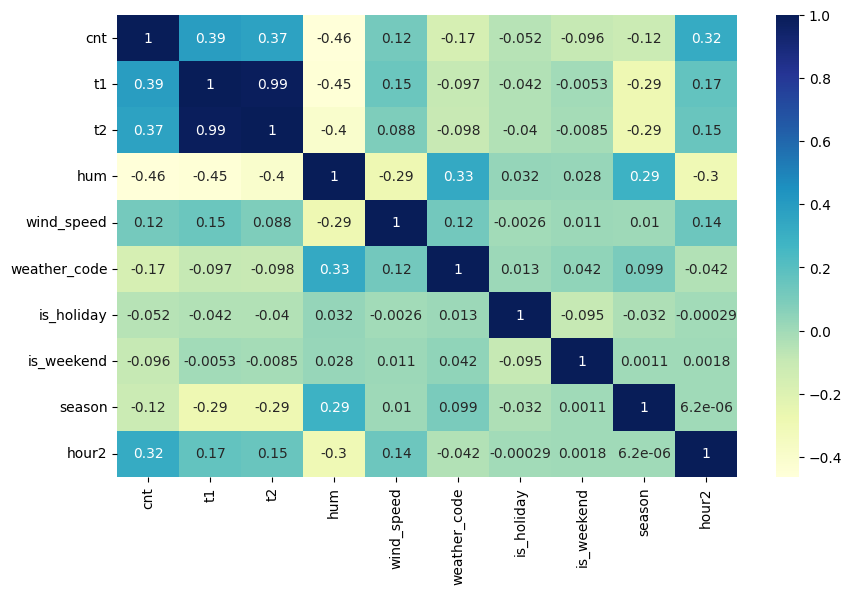

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);

* There is a very high (0.99) correlation between the temperature (t1) and the real feel (t2) and it would be appropriate to include only one of them in the ML analyses. 
* There is a positive and relatively strong (0.39) relation between the temperature and the number of bicycles rented. 
* There is a negative and relatively strong (0.45) relation between the temperature (t1) and humidity. 
* There is a negative and relatively strong (0.29) relation between wind speed and humidity. 

# Visualize the correlation of the target variable and the other features with barplot

In [35]:
# Corr():

df_corr_cnt = df.select_dtypes("number").corr()[["cnt"]].sort_values(by="cnt", ascending=False) # 2. way; df.corr().cnt
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour2,0.324423
wind_speed,0.116295
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
weather_code,-0.166633
hum,-0.462901


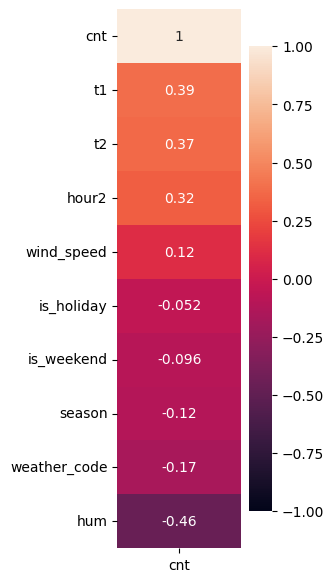

In [36]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1);

* There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity. 
What is more, the highest correlation in absolute values is with humidity (-0.46).

In [37]:
# Relation with the target variable (cnt) and other variables by barplot

target_corr = df.select_dtypes("number").corr().drop(["cnt"])
target_corr

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour2
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.000006
hour2,0.324423,0.168708,0.153956,-0.295653,0.141792,-0.041786,-0.000288,0.001803,0.000006,1.000000


In [38]:
target = target_corr["cnt"].sort_values(ascending=False)
target

t1              0.388798
t2              0.369035
hour2           0.324423
wind_speed      0.116295
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64

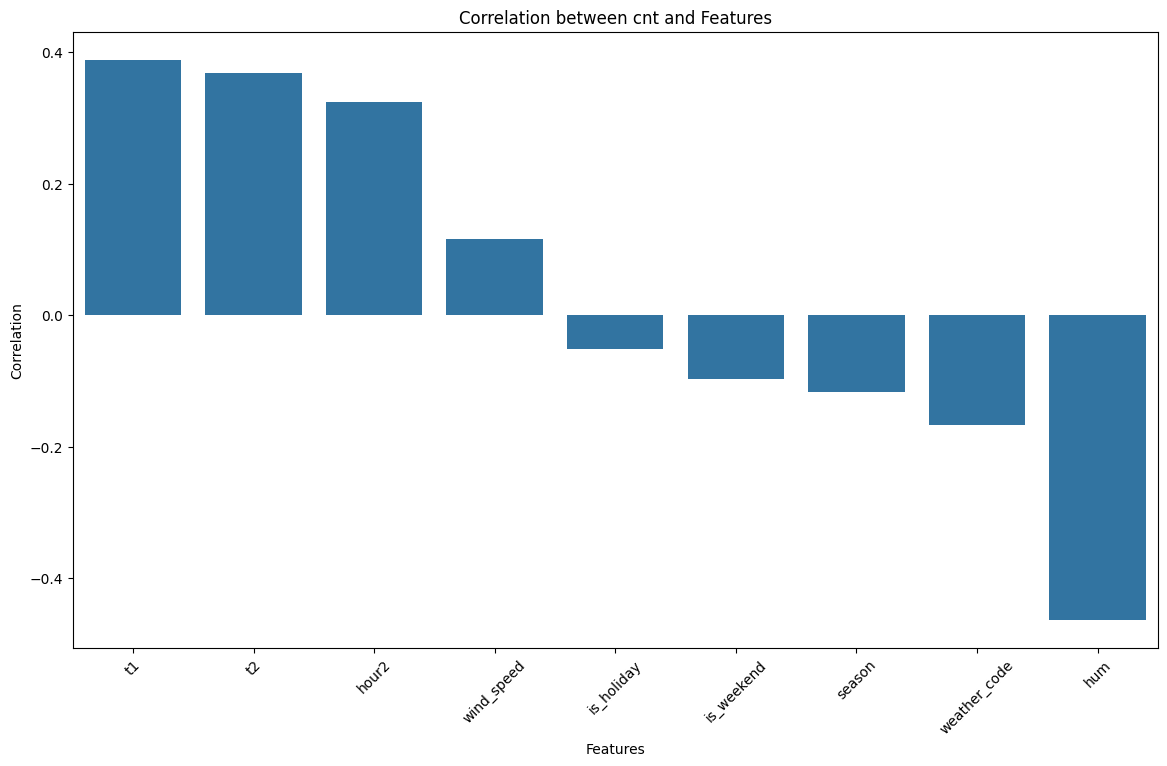

In [39]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target.index, y=target.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

* There are positive correlation between number of bike sharing and  temperature, hour, wind speed and season.On the other hand there are negative correlation between bike sharing and holidays, weekends, cold weather and hummudity.  

# Plot bike shares over time use lineplot.

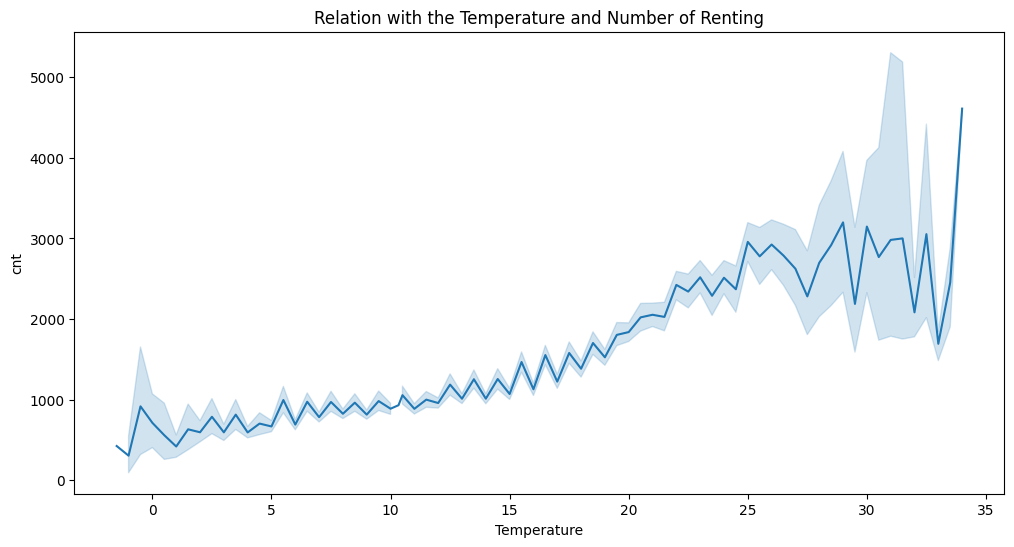

In [40]:
# Relation with the target variable (cnt) and temperature (t1) with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="t1", y="cnt")
plt.title("Relation with the Temperature and Number of Renting")
plt.xlabel("Temperature")

plt.show()

* With an increase in temperature, there is an increase in the number of bicycle rentals, going above 33 °C, there is a deep increase in rentals.

# Relation with the target variable (cnt) and humidity (hum)  with lineplot

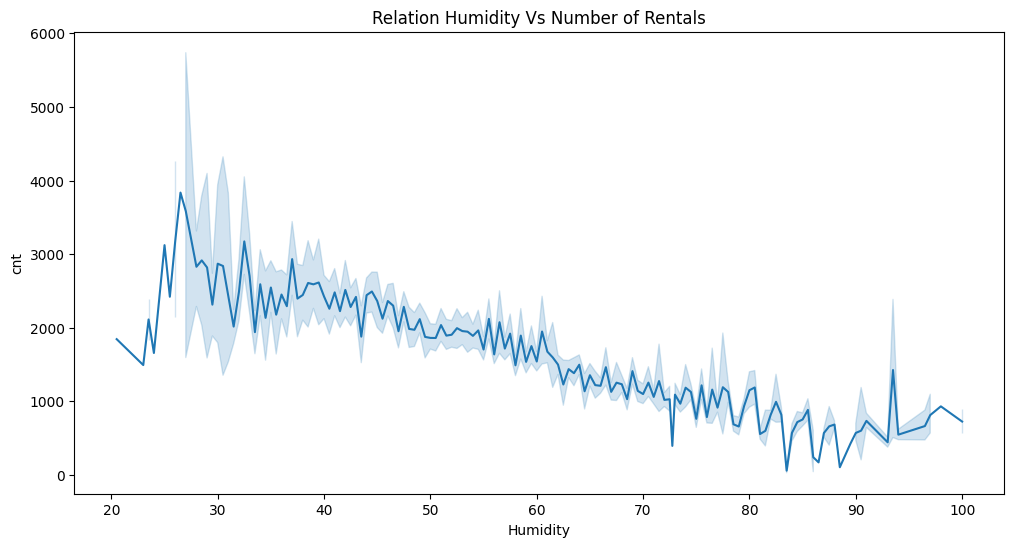

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hum", y="cnt")
plt.title("Relation Humidity Vs Number of Rentals")
plt.xlabel("Humidity")

plt.show()

* There is a negative relation between humidity and number of rentals.


# Target variable (cnt) vs wind speed (wind_speed) using lineplot

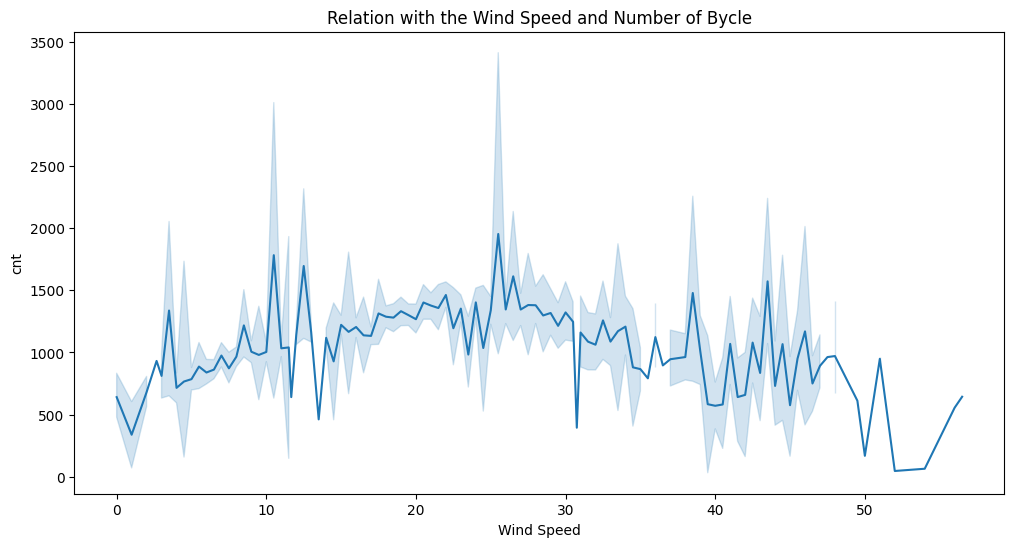

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="wind_speed", y="cnt")
plt.title("Relation with the Wind Speed and Number of Bycle")
plt.xlabel("Wind Speed")

plt.show()

* There is a concave parabolic relationship between wind speed and bicycle hire.
* While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

# Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).

In [43]:
df=pd.read_csv("london_merged.csv")

In [44]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [45]:
df = df.set_index('timestamp') 

In [46]:
df["year_month"] = df.index.strftime('%Y-%m') # we are obtaining year and moth together here.
df["year_month"]

timestamp
2015-01-04 00:00:00    2015-01
2015-01-04 01:00:00    2015-01
2015-01-04 02:00:00    2015-01
2015-01-04 03:00:00    2015-01
2015-01-04 04:00:00    2015-01
                        ...   
2017-01-03 19:00:00    2017-01
2017-01-03 20:00:00    2017-01
2017-01-03 21:00:00    2017-01
2017-01-03 22:00:00    2017-01
2017-01-03 23:00:00    2017-01
Name: year_month, Length: 17414, dtype: object

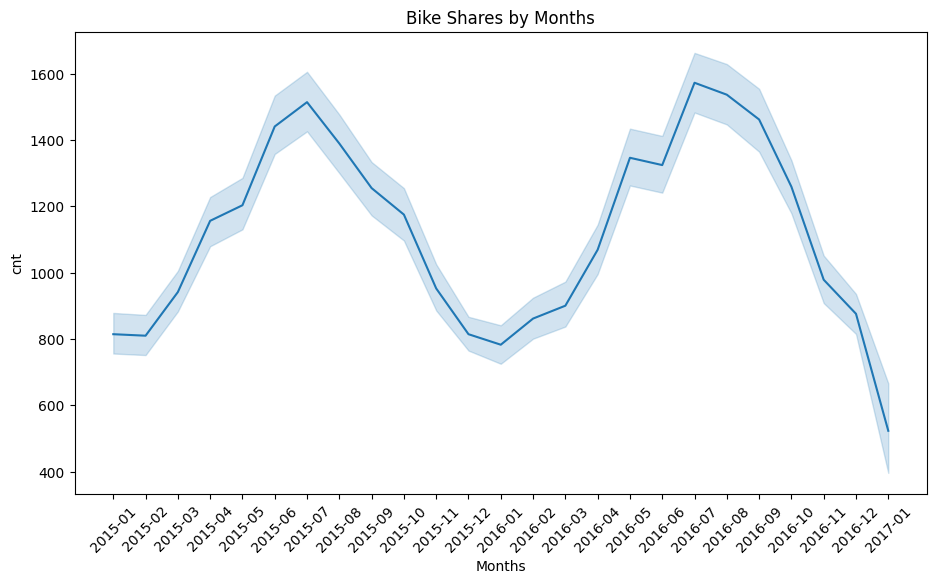

In [47]:
#  Bike shares by months with lineplot 

plt.figure(figsize=(11,6))

sns.lineplot(data=df, x="year_month", y="cnt")
plt.title("Bike Shares by Months")
plt.xlabel("Months")
#plt.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)

plt.show()

* Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March. Comparing figures from the 2 years values are similar in similar parts of the year.

In [48]:
df["month"] = df.index.strftime('%m') # we are obtaining moth here.
df["month"]

timestamp
2015-01-04 00:00:00    01
2015-01-04 01:00:00    01
2015-01-04 02:00:00    01
2015-01-04 03:00:00    01
2015-01-04 04:00:00    01
                       ..
2017-01-03 19:00:00    01
2017-01-03 20:00:00    01
2017-01-03 21:00:00    01
2017-01-03 22:00:00    01
2017-01-03 23:00:00    01
Name: month, Length: 17414, dtype: object

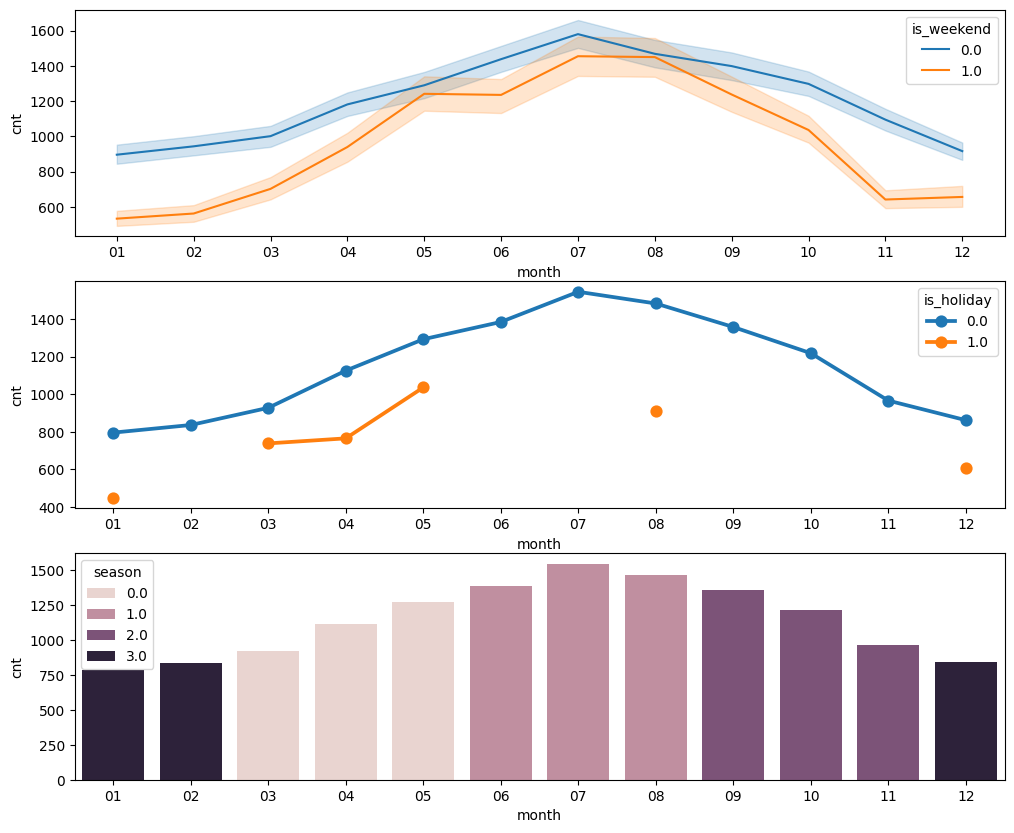

In [49]:
# In order to be able to make this analysis by taking into account the changes over the years;

fig, ax = plt.subplots(3,1, figsize=(12,10))

sns.lineplot(data=df,  x = "month", y="cnt", ax =ax[0], hue = "is_weekend")
sns.pointplot(data=df, x = "month", y="cnt", ax =ax[1], hue = "is_holiday", errorbar=None)
sns.barplot(data=df,   x = "month", y="cnt", ax =ax[2], hue = "season", errorbar=None)

plt.show()

* The number / demand for bicycle hire decreases towards the end of the year.

In [50]:
df["hour"] = df.index.strftime('%H') # we are obtaining hour here.
df["hour"]

timestamp
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

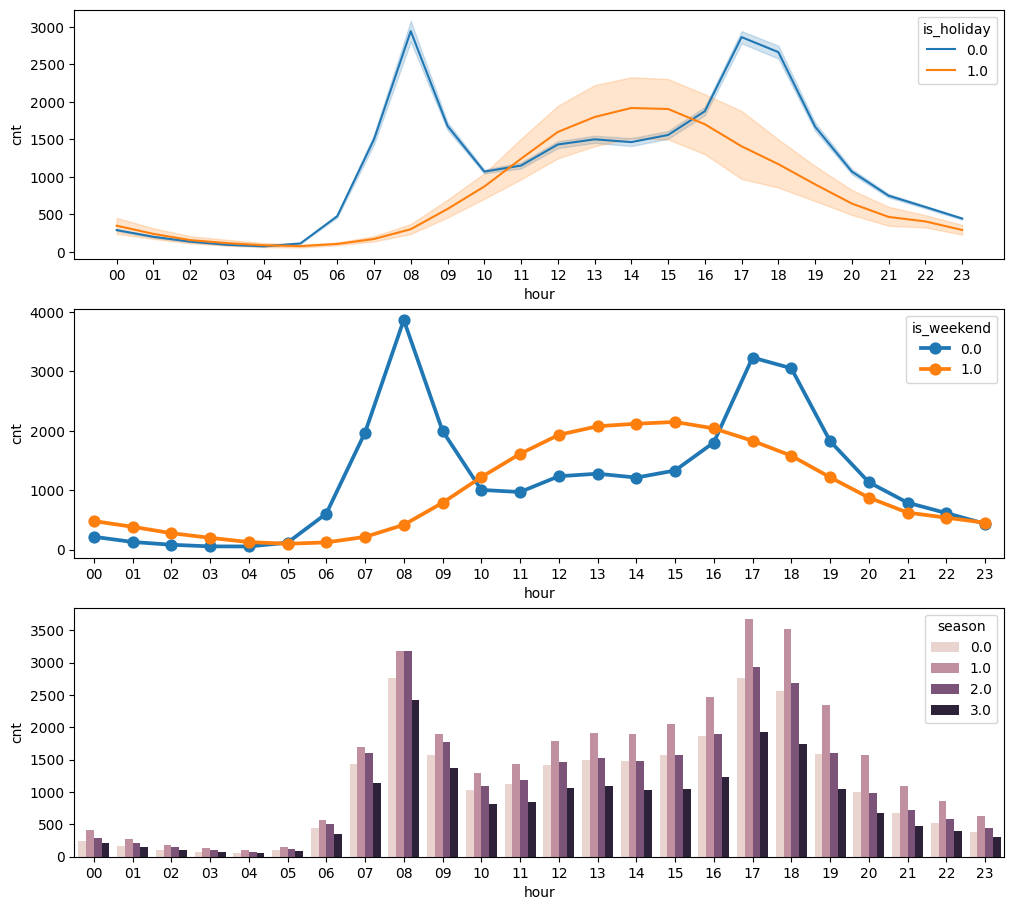

In [51]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="hour", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="hour", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

 # Plot bike shares by day of week. You may want to see whether it is a holiday or not

In [52]:
df["day_of_week"] = df.index.strftime('%w') # we are obtaining day of week here.
df["day_of_week"]

timestamp
2015-01-04 00:00:00    0
2015-01-04 01:00:00    0
2015-01-04 02:00:00    0
2015-01-04 03:00:00    0
2015-01-04 04:00:00    0
                      ..
2017-01-03 19:00:00    2
2017-01-03 20:00:00    2
2017-01-03 21:00:00    2
2017-01-03 22:00:00    2
2017-01-03 23:00:00    2
Name: day_of_week, Length: 17414, dtype: object

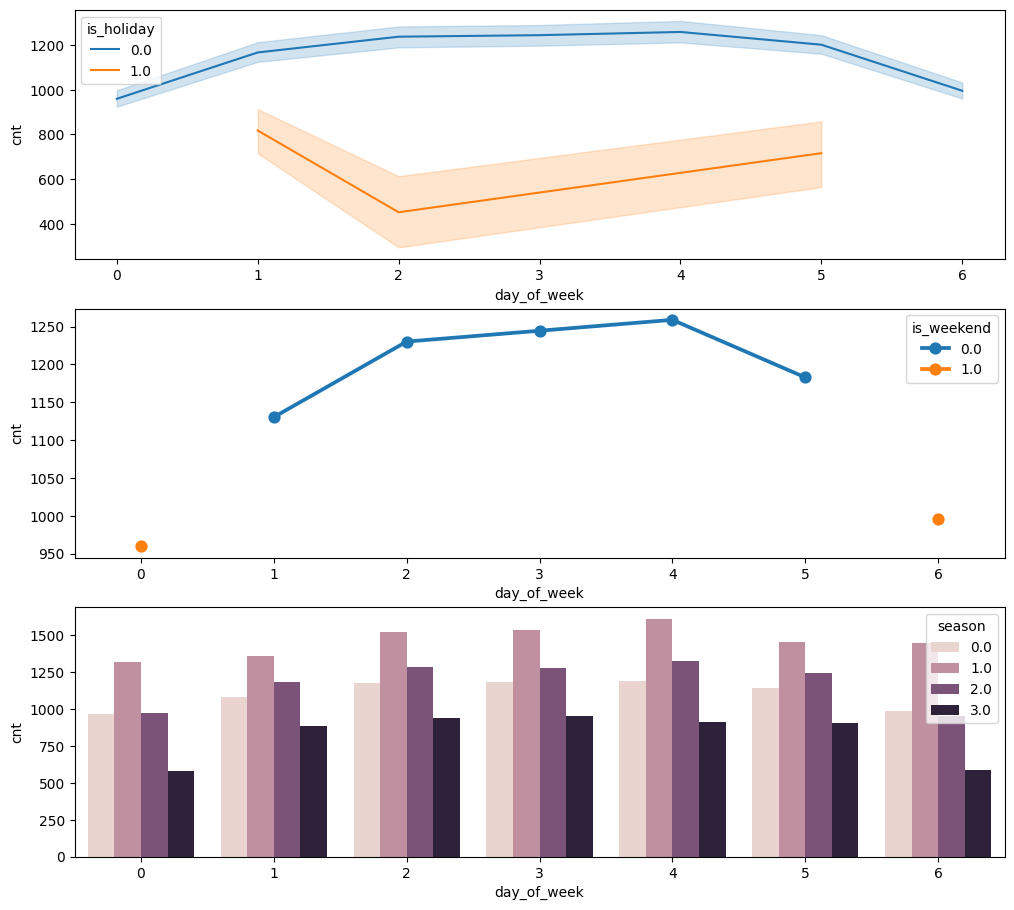

In [53]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day_of_week", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day_of_week", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle rental is higher on weekdays during non-holiday periods. It is higher in summer.

# Plot bike shares by day of month

In [ ]:
df["day"] = df.index.strftime('%d') # we are obtaining day of the months here.
df["day"]

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle hire demand generally fluctuates between 1000-1300 per day. It decreases end of the months and weekends.

# Plot bike shares by year (Plot bike shares on holidays by seasons)

In [ ]:
df["year"] = df.index.strftime('%Y') # we are obtaining year here.
df["year"]

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="year", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="year", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="year", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

* According to these graphs, the demand for bicycle hire increased slightly from 2015 to 2016.
* The reason for the drop in 2017 is that the dataset contains only Jabuary data for this year.

# Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [54]:
df.groupby("is_weekend")["is_weekend"].value_counts()

is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

In [55]:
df_isweekend = df.groupby("is_weekend")["cnt"].mean()
df_isweekend

is_weekend
0.0    1209.274831
1.0     977.415694
Name: cnt, dtype: float64

In [57]:
df_isweekend = round(df_isweekend,0)

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 17414 and the vector passed to `x` has length 2.

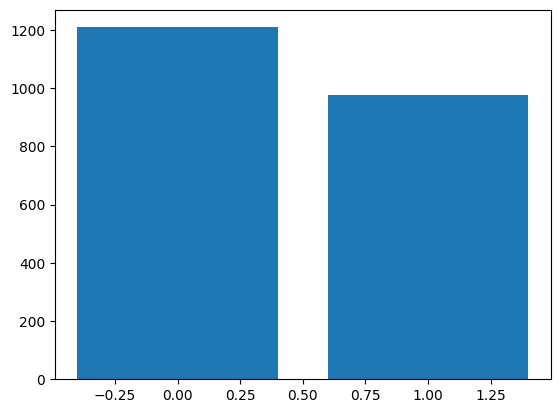

In [59]:
#  Bike shares by weekday/weekend with barchart

plt.bar(df_isweekend.index, df_isweekend.values); # Matplotlib

# sns.barplot(data=df, x=df_isweekend.index, y=df_isweekend.values); # Saeborn

ax = sns.barplot(x=df_isweekend.index, y=df_isweekend.values, data=df, errwidth=0) # Seaborn axlarla (sutun ustlerine degerleri yazdirabilmek icin)
for i in ax.containers:
    ax.bar_label(i)

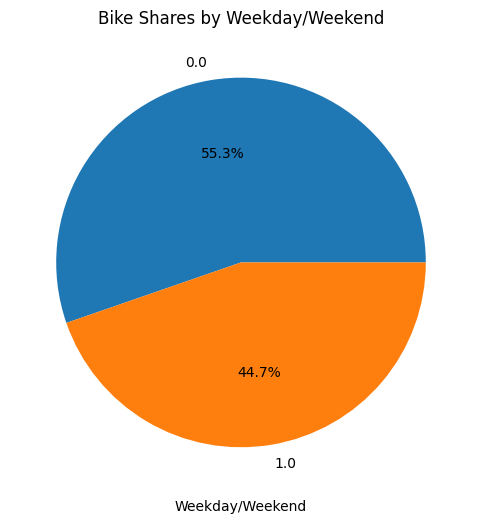

In [60]:
#  Bike shares by weekday/weekend with piechart by using Matplotlib

plt.figure(figsize=(8,6))

plt.pie( df_isweekend.values, labels= df_isweekend.index, autopct="%1.1f%%")
plt.title("Bike Shares by Weekday/Weekend")
plt.xlabel("Weekday/Weekend")

plt.show()

* Demand for bicycle hire is lower at weekends.

# Plot the distribution of weather code by seasons

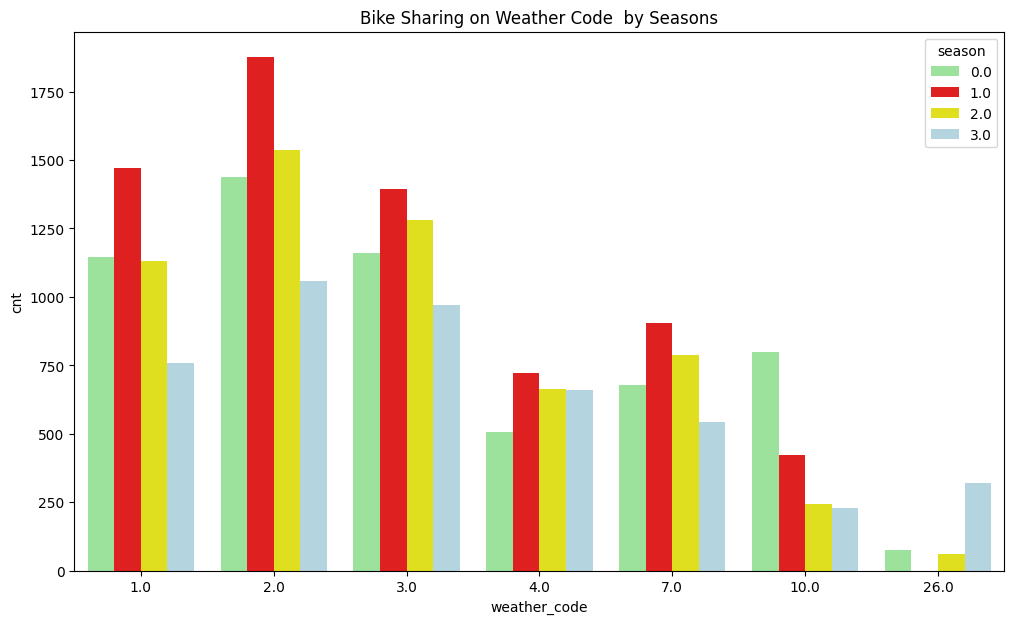

In [61]:
colors_of_seasons = ["lightgreen", "red", "yellow", "lightblue"]
plt.figure(figsize=(12,7))
sns.barplot(data=df, x="weather_code", y="cnt", hue="season", palette = colors_of_seasons, errorbar=None) # errorbar=None barların uzerinde ci cubuklarının cıkmasını onler.
plt.title("Bike Sharing on Weather Code  by Seasons")
plt.show()

* Demand for bicycle hire is higher in summer.

In [62]:
df_season = df.groupby("season")["cnt"].mean()
df_season

season
0.0    1103.831589
1.0    1464.465238
2.0    1178.954218
3.0     821.729099
Name: cnt, dtype: float64

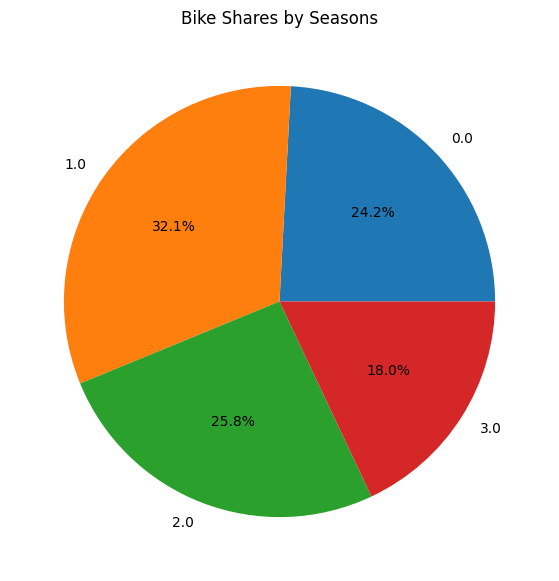

In [63]:
plt.figure(figsize=(10,7))

plt.pie( df_season.values, labels= df_season.index, autopct="%1.1f%%")
plt.title("Bike Shares by Seasons")
#plt.xlabel("Weekday/Weekend")

plt.show()

* 32% of the bicycle rental transactions took place in autumn, 25.8% in spring and 24.2% in winter.

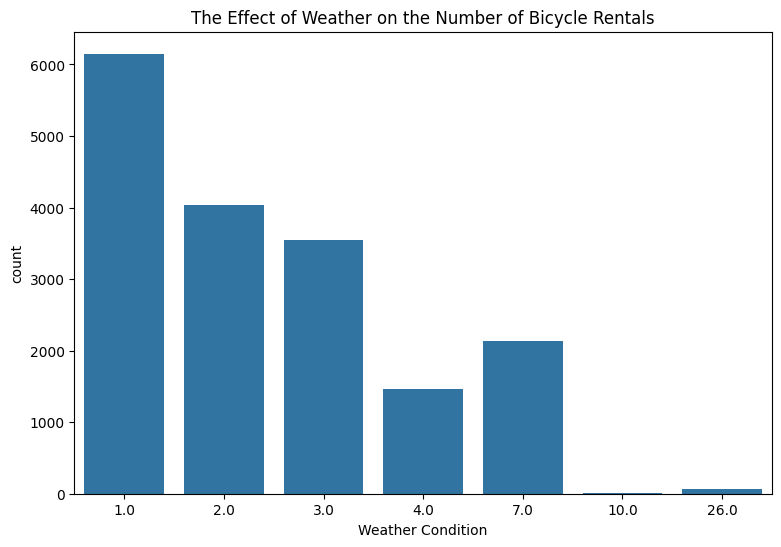

In [64]:
#For weather_condition;
plt.figure(figsize=(9,6))

sns.countplot(data=df, x=df["weather_code"])
plt.title("The Effect of Weather on the Number of Bicycle Rentals")
plt.xlabel("Weather Condition")

plt.show()

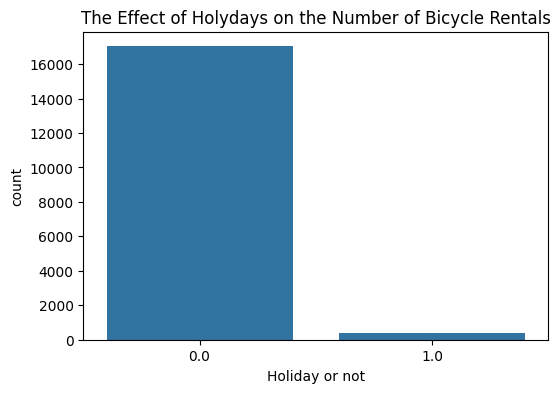

In [65]:
#For holydays

plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["is_holiday"]);
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

In [67]:
df["new_feature"] = df.groupby(["is_holiday"])["cnt"].value_counts().mean()
df["new_feature"] = df["new_feature"].round()
df["new_feature"]

timestamp
2015-01-04 00:00:00    4.0
2015-01-04 01:00:00    4.0
2015-01-04 02:00:00    4.0
2015-01-04 03:00:00    4.0
2015-01-04 04:00:00    4.0
                      ... 
2017-01-03 19:00:00    4.0
2017-01-03 20:00:00    4.0
2017-01-03 21:00:00    4.0
2017-01-03 22:00:00    4.0
2017-01-03 23:00:00    4.0
Name: new_feature, Length: 17414, dtype: float64

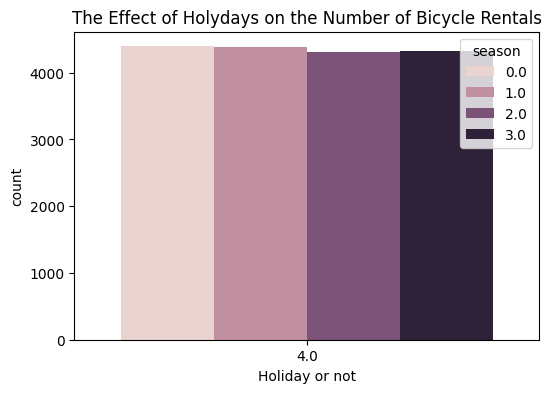

In [68]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["new_feature"], hue="season" );
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

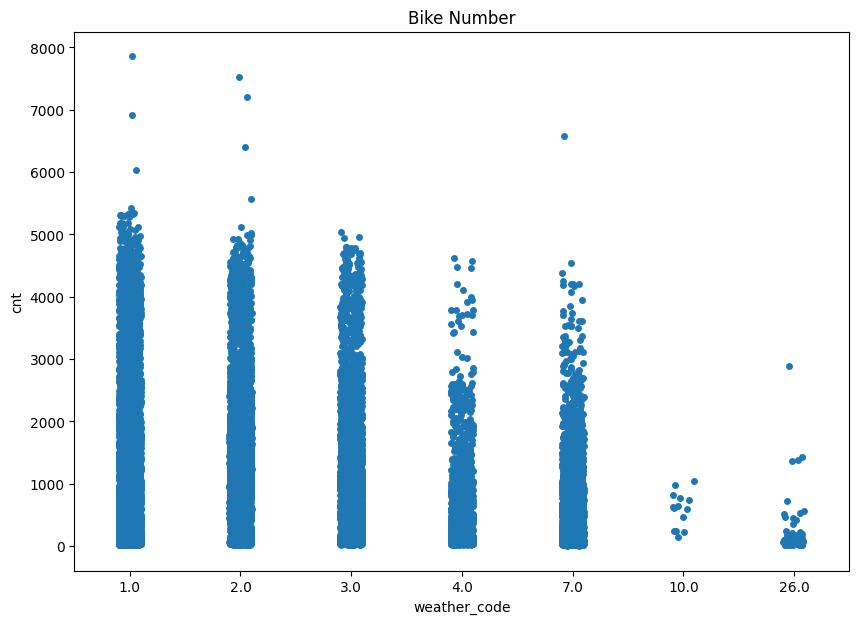

In [69]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="weather_code", y="cnt");

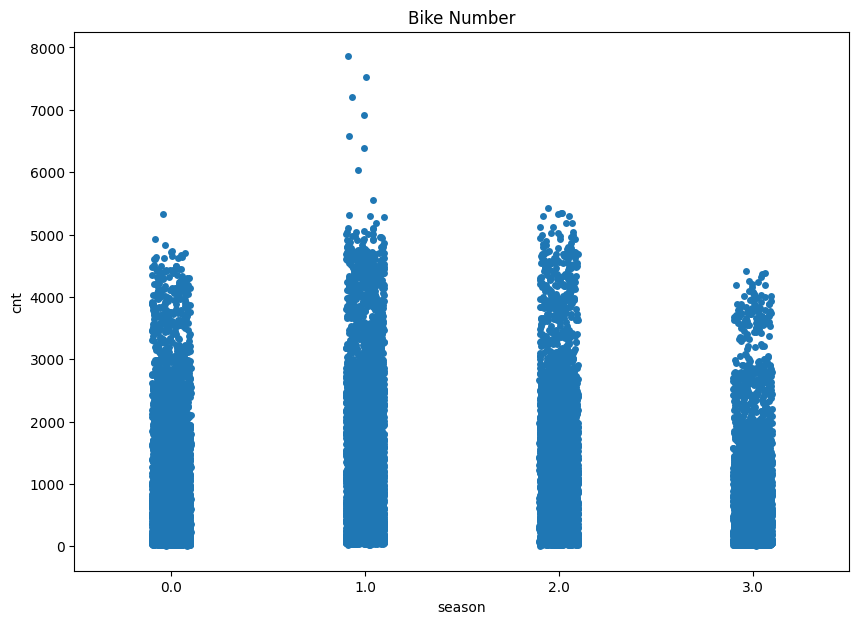

In [70]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="season", y="cnt");

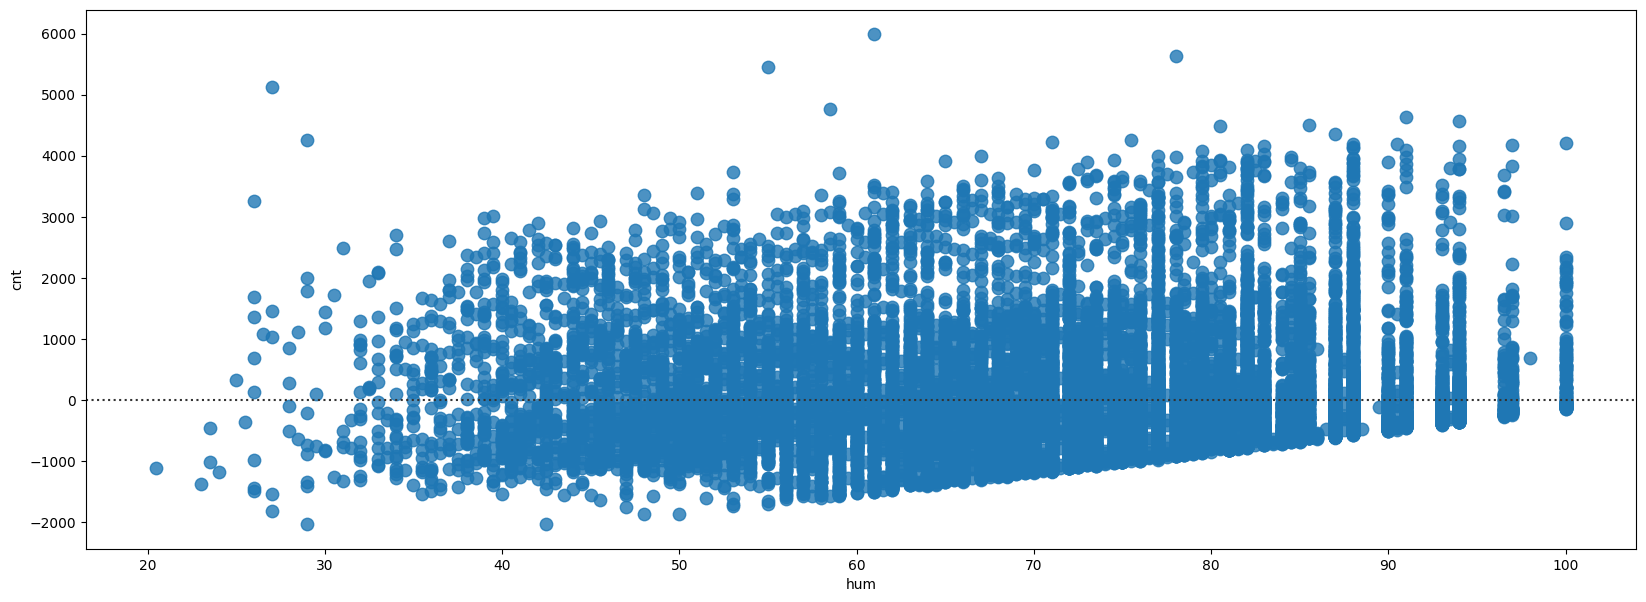

In [71]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="hum", y="cnt", scatter_kws={"s": 80});

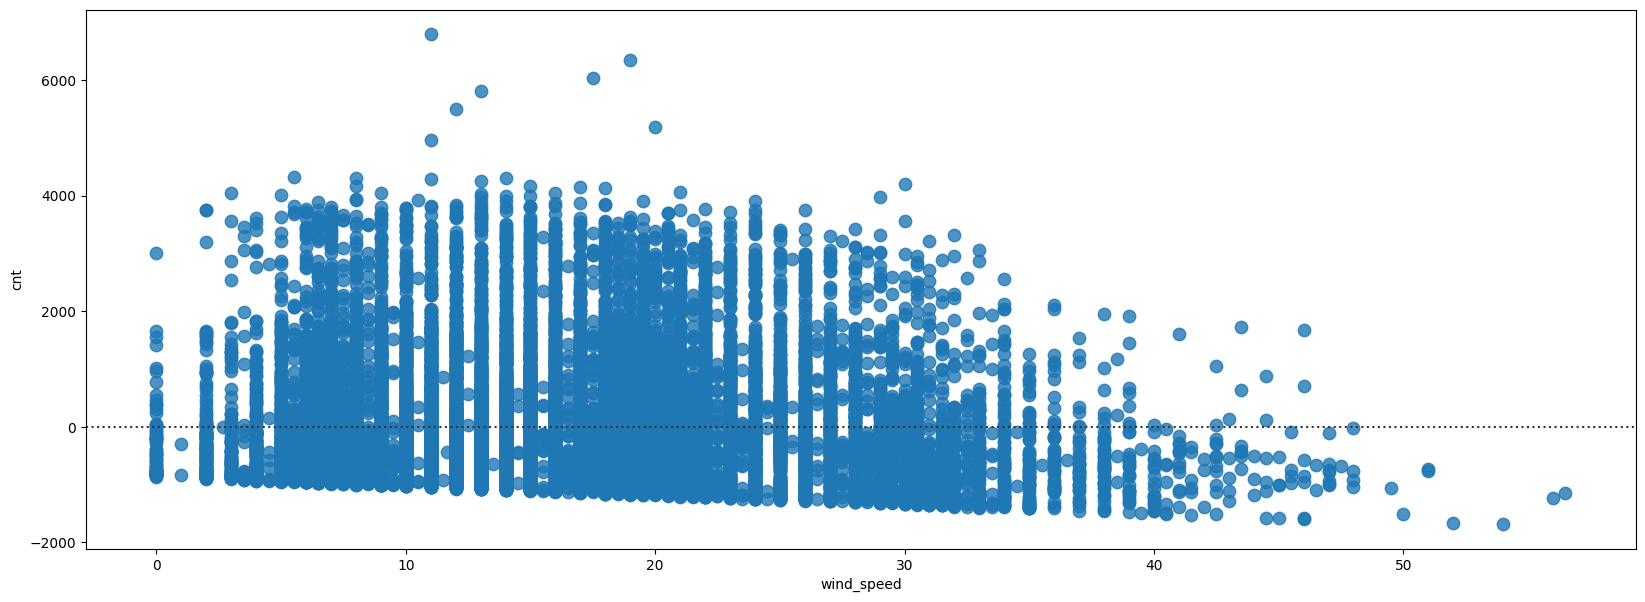

In [72]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="wind_speed", y="cnt", scatter_kws={"s": 80});

# THE END